<center><h1>Prosper Loan Data Exploration</h1></center>
<hr>
<h3>Table of contents:</h3>
<br>
<li><a href="#intro">Introduction</a></li>
<li><a href="#prel">Preliminary wrangling</a></li>
<li><a href="#univ">Uni-variate exploration</a></li>
<li><a href="#biv">Bi-variate exploration</a></li>
<li><a href="#multiv">Multi-variate exploration</a></li>
<li><a href="#conc">Conclusion</a></li>

<a id = "intro"></a>
# Introduction
In this project I am going to walk you through the analysis and visualisation process of the Prosper loans data which is a dataset provided from <a href='https://www.prosper.com/'>Prosper Marketplace Inc</a>, a company specializing in loans at low interest rates to the borrowers.<br>
This network represents loans between members of the peer-to-peer lending network. The online marketplace allows borrowers to post listings requesting loans. Lenders bid on these listings, which become loans if the amount requested is fully funded by the lenders. The network is directed from lender to borrower. Each edge also contains the time at which the loan originated, the amount requested, the loan status, the credit grade or rating of the borrower, the lender rate and the borrower rate, etc...(<a href='http://konect.cc/networks/prosper-loans/'>source</a>)<br>
The dataset is comprised of 81 variables and contains 113937 entries, you can learn more about what each columns signifies by clicking this <a href='https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0'>link</a>

<a id="prel"></a>
# Preliminary wrangling
In This section, I will perform a small data assessment/cleaning and have a brief look at the data at hand.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore") # Suppress warning messages
%matplotlib inline

In [2]:
loans = pd.read_csv("prosperLoanData.csv")
loans.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
93687,FE58338494819350464F2F9,117897,2007-04-01 18:48:27.637000000,AA,36,Completed,2010-04-13 00:00:00,0.08825,0.0814,0.0739,...,-24.11,0.0,0.00,0.00,0.0,1.0,0,0,0.0,72
34102,48193548306124054EF25DD,592688,2012-05-25 04:26:08.507000000,NaN,36,Current,NaN,0.25259,0.2148,0.2048,...,-32.89,0.0,0.00,0.00,0.0,1.0,0,0,0.0,9
26547,58D135989206590619D4AD8,1085797,2014-01-05 18:27:53.477000000,NaN,36,Current,NaN,0.22773,0.1905,0.1805,...,-14.56,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
81835,435235398545612522CDBE9,559033,2012-02-14 21:27:29.950000000,NaN,36,Current,NaN,0.11766,0.0899,0.0799,...,-98.65,0.0,0.00,0.00,0.0,1.0,0,0,0.0,134
109604,240B3405133170832FE425F,235907,2007-11-22 10:06:55.123000000,C,36,Completed,2010-12-27 00:00:00,0.19730,0.1900,0.1800,...,-188.51,0.0,0.00,0.00,0.0,1.0,0,0,0.0,162
80819,9A2D3406966081317C564F2,248882,2007-12-11 10:52:40.310000000,A,36,Chargedoff,2011-01-18 00:00:00,0.17430,0.1671,0.1571,...,-361.36,0.0,3055.34,3055.33,0.0,1.0,0,0,0.0,465
33833,B84E3470941520067BA60F0,439181,2009-12-19 14:19:47.867000000,NaN,36,Chargedoff,2010-06-01 00:00:00,0.27864,0.2555,0.2455,...,0.00,0.0,21500.00,21500.00,0.0,1.0,0,0,0.0,695
47979,9DD735423536258408DE8CE,574430,2012-04-02 02:47:49.117000000,NaN,36,Current,NaN,0.26681,0.2287,0.2187,...,-28.15,0.0,0.00,0.00,0.0,1.0,0,0,0.0,30
32357,65F6356336617019698FD78,678558,2012-11-27 17:25:20.463000000,NaN,60,Current,NaN,0.16519,0.1421,0.1321,...,-123.93,0.0,0.00,0.00,0.0,1.0,0,0,0.0,184
66875,061835977030305908E41E0,1075237,2014-01-01 15:49:47.127000000,NaN,60,Current,NaN,0.16328,0.1400,0.1300,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,107


In [3]:
loans.shape

(113937, 81)

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Selecting some of the columns we will work with

After looking at the data, and reading the description of each column, I decided to work with the following features:<br>
* `Term`
* `LoanStatus`
* `BorrowerAPR`
* `BorrowerRate`
* `LenderYield`
* `EstimatedLoss`
* `EstimatedReturn`
* `ProsperRating`
* `ProsperScore`
* `ListingCategory`
* `EmploymentStatus`
* `IsBorrowerHomeOwner`
* `DebtToIncomeRatio`
* `IncomeRange`
* `IncomeVerifiable`
* `MonthlyLoanPayment`
* `PercentFunded`
* `Investors`

In [5]:
# Selecting the columns we mentioned
loan_data = loans.iloc[:,[4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 19, 21, 46, 47, 48, 67, 76, 80]]
loan_data.sample(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,MonthlyLoanPayment,PercentFunded,Investors
79467,60,Current,0.27462,0.2489,0.2389,0.0890,0.14420,4.0,7.0,1,Employed,False,0.53,"$50,000-74,999",True,439.30,1.0,38
29245,36,Current,0.20051,0.1635,0.1535,0.0699,0.07355,4.0,7.0,1,Employed,False,0.14,"$100,000+",True,423.96,1.0,1
91150,60,Current,0.23277,0.2081,0.1981,0.0624,0.12390,4.0,5.0,1,Full-time,True,0.75,"$50,000-74,999",True,377.25,1.0,32
18392,36,Current,0.13138,0.1034,0.0934,0.0274,0.06310,6.0,8.0,1,Other,True,0.11,"$25,000-49,999",True,162.14,1.0,1
112417,60,Current,0.18555,0.1620,0.1520,0.0649,0.07766,4.0,5.0,1,Employed,False,0.25,"$50,000-74,999",True,366.37,1.0,4


I will now check for rows with empty cells and for duplicated data

In [6]:
# Checking for cells with empty cells
loan_data.isna().sum().sum()

127170

In [7]:
# Dropping rows with 
loan_data.dropna(inplace=True)
loan_data.isna().sum().sum()

0

In [8]:
# Checking for duplicate rows
loan_data.duplicated().sum()

337

In [9]:
loan_data.drop_duplicates(inplace=True)
loan_data.duplicated().sum()

0

In [10]:
loan_data.shape

(77220, 18)

In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77220 entries, 1 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Term                       77220 non-null  int64  
 1   LoanStatus                 77220 non-null  object 
 2   BorrowerAPR                77220 non-null  float64
 3   BorrowerRate               77220 non-null  float64
 4   LenderYield                77220 non-null  float64
 5   EstimatedLoss              77220 non-null  float64
 6   EstimatedReturn            77220 non-null  float64
 7   ProsperRating (numeric)    77220 non-null  float64
 8   ProsperScore               77220 non-null  float64
 9   ListingCategory (numeric)  77220 non-null  int64  
 10  EmploymentStatus           77220 non-null  object 
 11  IsBorrowerHomeowner        77220 non-null  bool   
 12  DebtToIncomeRatio          77220 non-null  float64
 13  IncomeRange                77220 non-null  ob

# Adding the loan amount to our data
In this section, I will add the total amount of debt for each data entry, as it might be useful later on, this columns will be created as so:
$Total\,loan\,=\,Term(number\,of\,months)\,*\,Monthly\,payment$<br>
<b>PS: </b>This is not meant to be an exact formula but only an approximation

In [12]:
loan_data["DebtAmount"] = loan_data.Term * loan_data.MonthlyLoanPayment
loan_data.DebtAmount.describe()

count    77220.000000
mean     12736.602085
std       8741.851286
min          0.000000
25%       5926.320000
50%      10840.920000
75%      18228.600000
max      53543.400000
Name: DebtAmount, dtype: float64

## Working on Categorical columns
### ListingCategory

For the listing category column each category is represented by a number where:
* `0`: `Not Available`
* `1`: `Debt Consolidation`
* `2`: `Home Improvement`
* `3`: `Business`
* `4`: `Personal Loan`
* `5`: `Student Use`
* `6`: `Auto`
* `7`: `Other`
* `8`: `Baby and Adoption`
* `9`: `Boat`
* `10`: `Cosmetic Procedure`
* `11`: `Engagement Ring`
* `12`: `Green Loans`
* `13`: `Household Expenses`
* `14`: `Large Purchases`
* `15`: `Medical`
* `16`: `Motorcycle`
* `17`: `RV`
* `18`: `Taxes`
* `19`: `Vacation`
* `20`: `Wedding Loans`

In the next couple of code cells, I will try to map each number with it's corresponding category, making this column categorical.

In [13]:
ListingCat = {
    0:"Not Available",
    1:"Debt Consolidation",
    2:"Home Improvement",
    3:"Business",
    4:"Personal Loan",
    5:"Student Use",
    6:"Auto",
    7:"Other",
    8:"Baby and Adoption",
    9:"Boat",
    10:"Cosmetic Procedure",
    11:"Engagement Ring",
    12:"Green Loans",
    13:"Household Expenses",
    14:"Large Purchases",
    15:"Medical",
    16:"Motorcycle",
    17:"RV",
    18:"Taxes",
    19:"Vacation",
    20:"Wedding Loans"
    
}

In [14]:
loan_data["ListingCategory (numeric)"] = loan_data["ListingCategory (numeric)"].map(ListingCat)

Lastly, I will change it's type to make it categroical:

In [15]:
listing_categories = loan_data["ListingCategory (numeric)"].unique()
ordered_var = pd.api.types.CategoricalDtype(
    # There isn't a logical order to the categories and for that reason, the order parameter is False
    ordered = False, 
    categories = listing_categories
)
loan_data["ListingCategory (numeric)"] = loan_data["ListingCategory (numeric)"].astype(ordered_var)

### Term
After looking at a sample of our data, I noticed that the same numbers re-occur multiple times, to confirm that this feature is in fact categorical, I will take a look at it's unique values 

In [16]:
loan_data.Term.unique()

array([36, 60, 12])

We can see that the whole column only have 3 values(12, 36 and 60 all expressed in months), so it is in fact categorical, we can also order it by value

In [17]:
term_categories = [12, 36, 60]
ordered_var = pd.api.types.CategoricalDtype(
    ordered = True,
    categories = term_categories
)
loan_data["Term"] = loan_data["Term"].astype(ordered_var)

### EmploymentStatus
Like we did before, I will take a look at the unique values of this column in order to:
* 1) confirm that it is in fact categorical
* 2) check if the categories can be ordered

In [18]:
loan_data.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Part-time', 'Retired',
       'Self-employed', 'Not employed'], dtype=object)

In [19]:
employment_categories = loan_data.EmploymentStatus.unique()
ordered_var = pd.api.types.CategoricalDtype(
    ordered = True,
    categories = employment_categories
)
loan_data["EmploymentStatus"] = loan_data["EmploymentStatus"].astype(ordered_var)

### IncomeRange
The same work I did in the other columns will be done here.

In [20]:
loan_data.IncomeRange.unique()

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed'], dtype=object)

We can see that the values of this column are in fact categorical and can also be ordered with `Not Employed` being the lowest and `$100,000+` being the highest but before we do that, i would like to change the names of each category like so:
* Not employed -> NotEmployed
* 1-24,999 -> Low
* 25,000-49,999 -> LowerMiddle
* 50,000-74,999 -> Middle
* 75,000-99,999 -> UpperMiddle
* 100,000+ -> High

In [21]:
IncomeDict = {
    "Not employed": "NotEmployed",
    "$1-24,999": "Low",
    "$25,000-49,999": "LowerMiddle",
    "$50,000-74,999": "Middle",
    "$75,000-99,999": "UpperMiddle",
    "$100,000+": "High"
}
loan_data.IncomeRange = loan_data.IncomeRange.map(IncomeDict)

In [22]:
loan_data.IncomeRange.unique()

array(['Middle', 'LowerMiddle', 'High', 'UpperMiddle', 'Low',
       'NotEmployed'], dtype=object)

In [23]:
income_categories = ["NotEmployed", "Low", "LowerMiddle", "Middle", "UpperMiddle", "High"]
ordered_var = pd.api.types.CategoricalDtype(
    ordered = True,
    categories = income_categories
)
loan_data["IncomeRange"] = loan_data["IncomeRange"].astype(ordered_var)

### LoanStatus

In [24]:
loan_data.LoanStatus.unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [25]:
status_categories = loan_data.LoanStatus.unique()
ordered_var = pd.api.types.CategoricalDtype(
    ordered = True,
    categories = status_categories
)
loan_data["LoanStatus"] = loan_data["LoanStatus"].astype(ordered_var)

## Finishing the preliminary wrangling phase
To conclude the preliminary wrangling phase, I would like to go through the actions we took once more:
<li>Remove rows with empty cells</li>
<li>Remove duplicate rows</li>
<li>Convert columns with categorical data to the "category" data type</li>
I will now change some of the column names to make it easier to work with later on.

In [26]:
cols = {
    "ProsperRating (numeric)": "ProsperRating",
    "ListingCategory (numeric)": "ListingCategory",
}

loan_data.rename(columns=cols, inplace=True)

In [27]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77220 entries, 1 to 113936
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Term                 77220 non-null  category
 1   LoanStatus           77220 non-null  category
 2   BorrowerAPR          77220 non-null  float64 
 3   BorrowerRate         77220 non-null  float64 
 4   LenderYield          77220 non-null  float64 
 5   EstimatedLoss        77220 non-null  float64 
 6   EstimatedReturn      77220 non-null  float64 
 7   ProsperRating        77220 non-null  float64 
 8   ProsperScore         77220 non-null  float64 
 9   ListingCategory      77220 non-null  category
 10  EmploymentStatus     77220 non-null  category
 11  IsBorrowerHomeowner  77220 non-null  bool    
 12  DebtToIncomeRatio    77220 non-null  float64 
 13  IncomeRange          77220 non-null  category
 14  IncomeVerifiable     77220 non-null  bool    
 15  MonthlyLoanPayment

In [28]:
loan_data.to_csv("Loan_data_clean.csv", index=False)

### Conclusion
With this phase coming to an end, we will now go to the data exploration phase, but before that, I would like to ask some questions (that will be answered in the next phases) to hopefully guide us through the analysis!
#### Questions:
<li>What is the most common term(duration) for loans?</li>
<li>What is the employment status's demographics of the Prosper loans platform?</li>
<li>What are the most common income ranges that use the ProsperLoans platform?</li>
<li>Does longer terms mean higher returns ?</li>
<li>Does the length of the term have any impact on the borrower's rate? borrower's APR?</li>
<li>What categories of listings have the highest average loan amount?</li>
<li>Does the employment status have any effect on the amount of debt taken ?</li>
<li>Does higher income range mean more investors?</li>
<li>Does higher income range mean higher Debt to income ratio?</li>
<li>Is there any correlation between the Prosper score (or rating) and the lender's yield (or loss) ?</li>

Some of these questions will be answered in the Uni-variate or Bi-variate exploration phase, and take some of the visualisations we will make to the multivariate phase to see the impact of other variables on the findings we will get.

<a id="univ"></a>
# Uni-variate exploration

In [29]:
def make_count_plot(Data, Var, Title, FigSize):
    base_color = sb.color_palette()[0]
    # Determine the graph's size
    plt.figure(figsize=FigSize)
    sb.countplot(data=Data, x=Var, color=base_color)
    plt.title(Title)

## What is the most common term(duration) for loans?
For this question, I will make a simple bar plot to show the count of each term in our data.

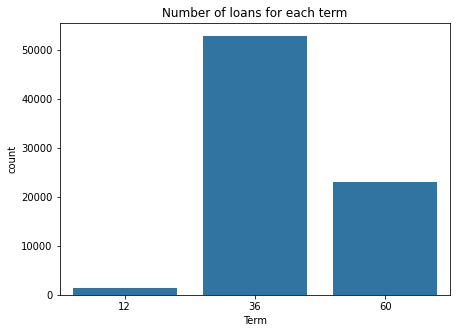

In [30]:
make_count_plot(loan_data, "Term", "Number of loans for each term", (7, 5))

We can see from the bar chart we just made, that the majority of loans present in our data have a term length of 36 months with 60 months being second and 12 months being last, this must be because medium length terms have the sweet spot of loan length to comfort ration, meaning that short terms are harder to pay of but shorter, and long terms are easier to pay off but longer, thus choosing medium term lengths.

## What is the employment status's demographics of the Prosper loans platform?
Like we did in the Term length section, to answer this question, we will make a bar chart that represents the count of each employment status present in our data

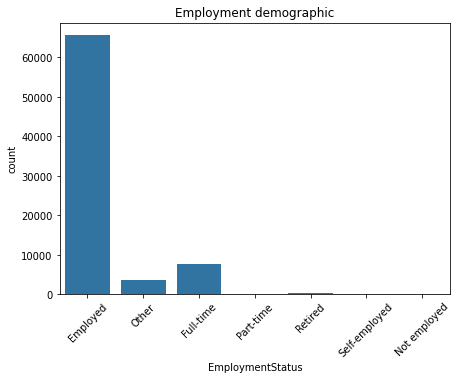

In [31]:
make_count_plot(loan_data, "EmploymentStatus", "Employment demographic", (7, 5))
plt.xticks(rotation = 45);

We can see from the graph we got just now, that most of the users that got loans are employed/full-time employees with others being just a minority, which is to be expected in my opinion.

## What are the most common income ranges that use the ProsperLoans platform?

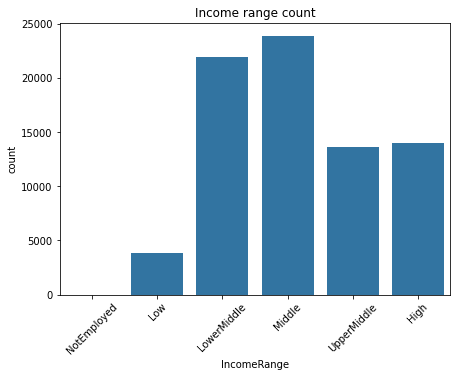

In [32]:
make_count_plot(loan_data, "IncomeRange", "Income range count", (7, 5))
plt.xticks(rotation = 45);

After observing the graph above, we can see that people with lower-middle and middle income are most likely to take loans(at least in this platform), with people with higher income taking second place and lastly people with low income / no income being the rarer case in this data.<br>
To be honest, I expected people with low income to be the minority, since lower income means a lower chance of paying off that debt(lower income => fear of debt), but I find the rest to be more interesting (low-middle to high income), as i expected the complete opposite.

<a id="biv"></a>
# Bi-variate exploration
## Does longer terms mean higher returns ?

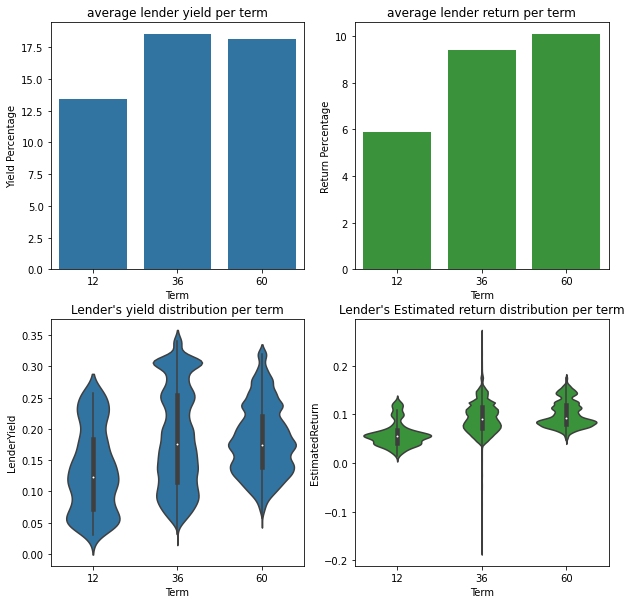

In [33]:
plot_data = loan_data.groupby(["Term"])[["LenderYield", "EstimatedReturn"]].mean()
plt.figure(figsize=(10, 10))
default_color = sb.color_palette()


plt.subplot(221)
sb.barplot(data = plot_data, x = plot_data.index, y = plot_data.LenderYield*100, color=default_color[0])
plt.title("average lender yield per term")
plt.xlabel("Term")
plt.ylabel("Yield Percentage")

plt.subplot(222)
sb.barplot(data = plot_data, x = plot_data.index, y = plot_data.EstimatedReturn*100, color=default_color[2])
plt.title("average lender return per term")
plt.xlabel("Term")
plt.ylabel("Return Percentage")

plt.subplot(223)
sb.violinplot(data = loan_data, x = "Term", y = "LenderYield", color=default_color[0])
plt.title("Lender's yield distribution per term")

plt.subplot(224)
sb.violinplot(data = loan_data, x = "Term", y = "EstimatedReturn", color=default_color[2])
plt.title("Lender's Estimated return distribution per term");

For this graph, I will breakdown my observation into two sections:
<h4>For the bar charts in the first row of the plot</h4>
<li>For the lender's yield graph, we can see that medium terms (36 months) higher yield potential than the others with an average of over 17.5% while longer terms (60 months) come in the second place but having a similar average to that of 36 months.</li>
<li>As for the lender's estimated return, we can see that with longer terms we have a higher average return.</li>
<h4>For the violin charts in the second row of the plot</h4>
<li>In the lender's yield violin plot we can see that for shorter terms, the yield is almost uniformaly distributed between it's maximum and minimum values, it also have the lowest minimum and maximum, for the 36 months term, it has significantly more potential for yield than it's shorter alternative, having the highest maximum and with many values situated in the upper end, lastly, for the 60 months term, we can see that it has the highest minimum compared to the other terms with most of it's values in the 10 to 20%.</li>
<li>In the lender's estimated return, we can see that for the 12 and 60 months terms, we have a similar distribution (with the 60 months term' values being shifted up slightly), with the majority of the values below the median, what peaks my interest more, is the amount of outliers in the 36 months term, be it below or above the violin plot, which makes me wonder, if the medium term is riskiest of all terms for the lender (we can notice that it is the only term that has negative values).</li>


## Does the length of the term have any impact on the borrower's rate? borrower's APR?

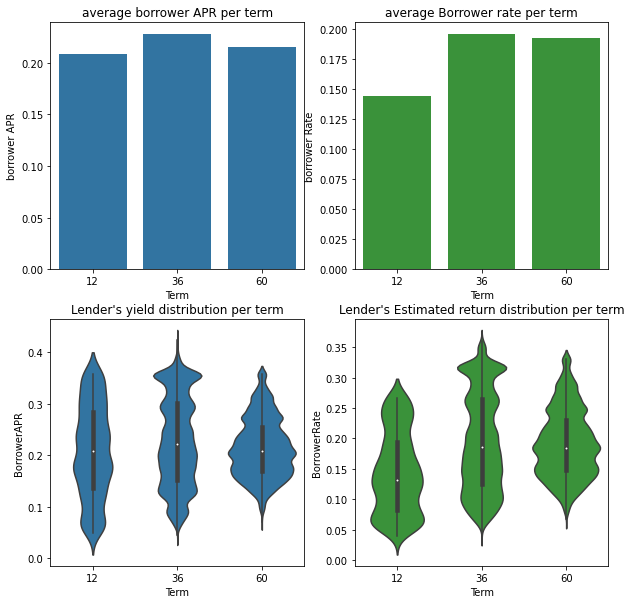

In [34]:
plot_data = loan_data.groupby(["Term"])[["BorrowerAPR", "BorrowerRate"]].mean()
plt.figure(figsize=(10, 10))
default_color = sb.color_palette()

plt.subplot(221)
sb.barplot(data = plot_data, x = plot_data.index, y = plot_data.BorrowerAPR, color=default_color[0])
plt.title("average borrower APR per term")
plt.xlabel("Term")
plt.ylabel("borrower APR")

plt.subplot(222)
sb.barplot(data = plot_data, x = plot_data.index, y = plot_data.BorrowerRate, color=default_color[2])
plt.title("average Borrower rate per term")
plt.xlabel("Term")
plt.ylabel("borrower Rate");

plt.subplot(223)
sb.violinplot(data = loan_data, x = "Term", y = "BorrowerAPR", color=default_color[0])
plt.title("Lender's yield distribution per term")

plt.subplot(224)
sb.violinplot(data = loan_data, x = "Term", y = "BorrowerRate", color=default_color[2])
plt.title("Lender's Estimated return distribution per term");

Like we did in the previous question, I will breakdown my observation into two sections:
<h4>For the bar charts in the first row of the plot</h4>
<li>In the borrower's APR bar graph, we can see that all terms have similar APRs with the 36 months term coming in the top at approximately 23%.</li>
<li>In the borrower's rate bar graph, we can see that we have a slightly more noticeable difference between each term and it's corresponding average rate, with the 12 months term being the lowest at almost 15% and the 36 months and 60 months terms being close (36 months is slightly higher).</li>
<h4>For the violin charts in the second row of the plot</h4>
We can see from both graphs that they have an almost identical distribution except for the 12 months term's violin plot where the borrower's rate plot have a similar shape to that of the Borrower's APR's but with slightely lower maximum values and more values at and below the median.<br>
In both graphs, the 36 months term has significantly more uniform distribution compared to the other terms, having the highest maximum and with many values situated in the upper end, lastly, for the 60 months term, we can see that it has most of it's values in the 10 to 20%.<br>

<b>Judging from the similarities in the shape of the violin plots in this section and the lender's yield's violin plot, I can help but ask if there is any correlation between them ?</b>
## Are there any correlation between the lender's yield, the borrower's rate and the borrower's APR?

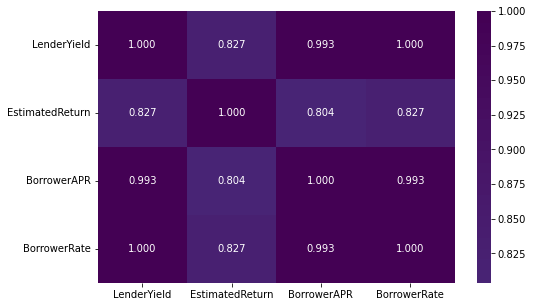

In [35]:
# Correlation plot between the values in question
plt.figure(figsize = [8, 5])
sb.heatmap(loan_data[["LenderYield", "EstimatedReturn", "BorrowerAPR", "BorrowerRate"]].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.show()

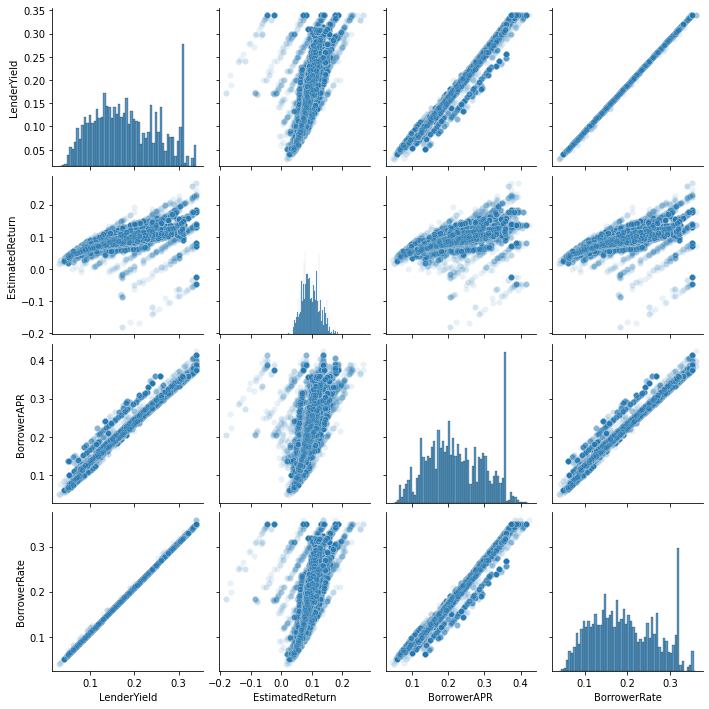

In [36]:
# Pairplot of the values in question
sb.pairplot(
    loan_data[["LenderYield", "EstimatedReturn", "BorrowerAPR", "BorrowerRate"]],
    plot_kws = {"alpha": 0.1}
);

As suspected, there is in fact a strong correlation between the lender's yield, the borrower's rate and the borrower's APR, we do also have some sort of correlation between the estimated return and the other values but it is not as highly correlated!

## What categories of listings have the highest average loan amount?

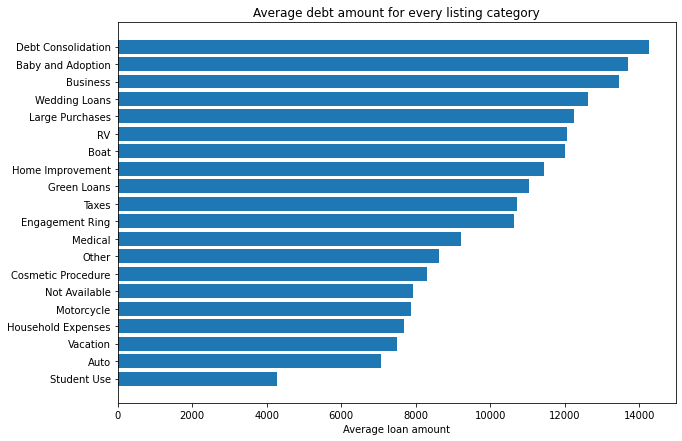

In [37]:
plot_data = loan_data.groupby(["ListingCategory"]).DebtAmount.mean()
plot_data.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(10,7))
plt.barh(plot_data.index, plot_data.values)
plt.title("Average debt amount for every listing category")
plt.xlabel("Average loan amount");

For this graph, we can see that some listing categories have higher average debt amount compared to the others, with things related to babies and adoption, paying off other debts and business related debts sitting at the top, personal life related listings (like home improvement, taxes and engagement rings) sitting in the middle and finally expenses, vacation and loans for students sitting at the bottom of the graph

## Does the employment status have any effect on the amount of debt taken ?

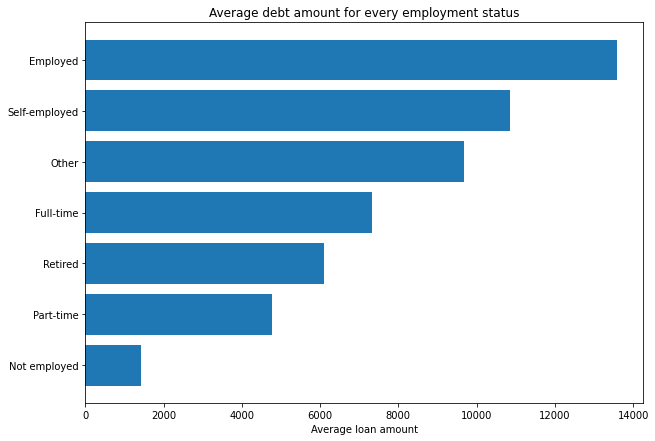

In [38]:
plot_data = loan_data.groupby(["EmploymentStatus"]).DebtAmount.mean()
plot_data.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(10,7))
plt.barh(plot_data.index, plot_data.values)
plt.title("Average debt amount for every employment status")
plt.xlabel("Average loan amount");

From the results seen in the graph below, it is kind of expected to see these results since employed people can afford bigger loans than those who are retired, part-timers or not employed.

## Does higher income range mean more investors?

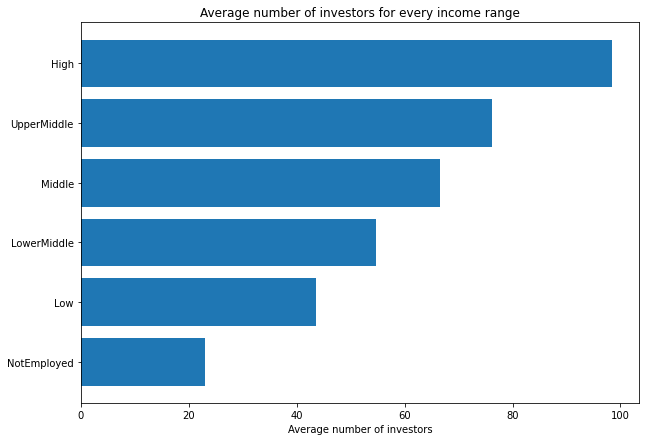

In [39]:
plot_data = loan_data.groupby(["IncomeRange"]).Investors.mean()
plot_data.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(10,7))
plt.barh(plot_data.index, plot_data.values)
plt.title("Average number of investors for every income range")
plt.xlabel("Average number of investors");

We can see from this graph that people with higher income have a significantly higher average investors than those with lower income, at least for this data, this might be because of the income range or because of other factors.

## Does higher income range mean higher Debt to income ratio?

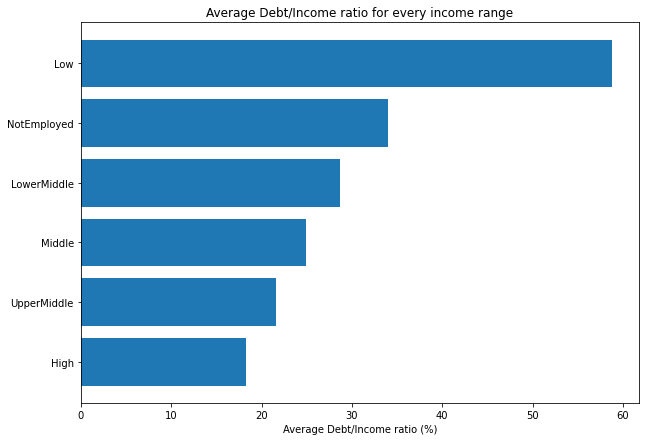

In [40]:
plot_data = loan_data.groupby(["IncomeRange"]).DebtToIncomeRatio.mean()
plot_data.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(10,7))
plt.barh(plot_data.index, plot_data.values*100)
plt.title("Average Debt/Income ratio for every income range")
plt.xlabel("Average Debt/Income ratio (%)");

For this section of this exploration, we can see from the graph we made that users with low income have the highest income/debt ratio, this ratio decreases as the income range increases, as we said in earlier parts, people with higher income can simply afford more loans and have more money to spare (which is logical), hence the results we just got.

## Is there any correlation between the Prosper score (or rating) and the lender's yield (or loss) ?

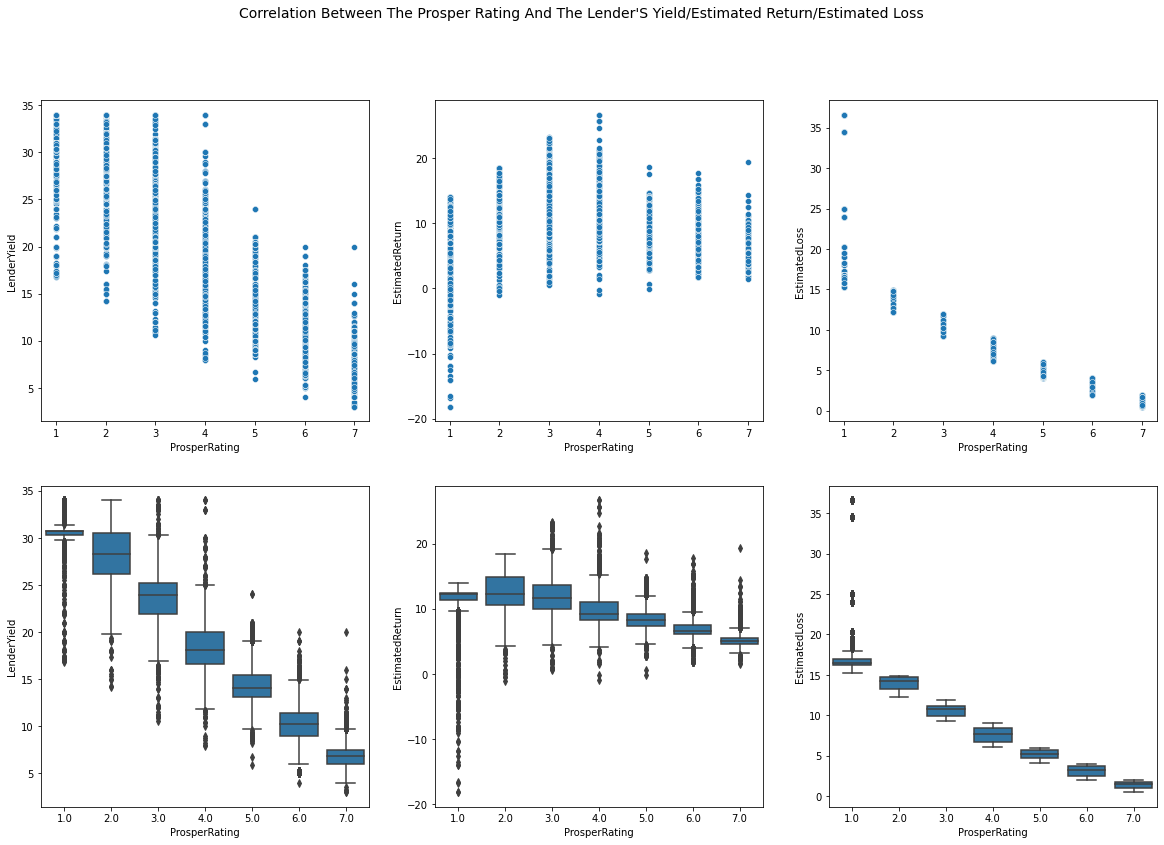

In [41]:
plt.figure(figsize=(20, 13))

plt.subplot(231)
sb.scatterplot(data=loan_data, x = loan_data.ProsperRating, y = loan_data.LenderYield*100)

plt.subplot(232)
sb.scatterplot(data=loan_data, x = loan_data.ProsperRating, y = loan_data.EstimatedReturn*100)

plt.subplot(233)
sb.scatterplot(data=loan_data, x = loan_data.ProsperRating, y = loan_data.EstimatedLoss*100);

plt.subplot(234)
sb.boxplot(data=loan_data, x = loan_data.ProsperRating, y = loan_data.LenderYield*100, color=default_color[0])

plt.subplot(235)
sb.boxplot(data=loan_data, x = loan_data.ProsperRating, y = loan_data.EstimatedReturn*100, color=default_color[0])

plt.subplot(236)
sb.boxplot(data=loan_data, x = loan_data.ProsperRating, y = loan_data.EstimatedLoss*100, color=default_color[0])

plt.suptitle(
    "Correlation between the Prosper rating and the lender's yield/estimated return/estimated loss".title(),
    fontsize = 14
);

From this plot above, we can observe that, for the scatter plots I made that there is some sort of correlation between the rating and the other variables but after making the corresponding box plot under each scatter plot we can observe that:
* For the lender's yield: there are many outliers in the boxplot but if we ignore them, we can see a negative correlation between it and the prosper rating.
* For the estimated return: it also have a significant amount of outliers but it does also have a negative correlation between it and the prosper rating, but this time, it doesn't decrease that much when the rating increases.
* For the estimated loss: it doesn't have as much outliers as the other two vairables, it also have a negative correlation between it and the prosper rating.

<a id="multiv"></a>
# Multi-variate exploration
I will now go to the last phase of our exploration analysis, we got some really interesting results with the plots we did, and as I said before, I would like to center this phase on the explorations we just did, but before proceeding, I would like to ask some questions to hopefully guide us!
#### Questions: 
<li>Does the term length play a role in the relation between the Prosper score (or rating) and the lender's yield (or loss) ?</li>
<li>Does home ownership play a role on the amount of loan taken or the debt/income ratio?</li>

## Does the term length play a role in the relation between the Prosper score (or rating) and the lender's yield (or loss) ?

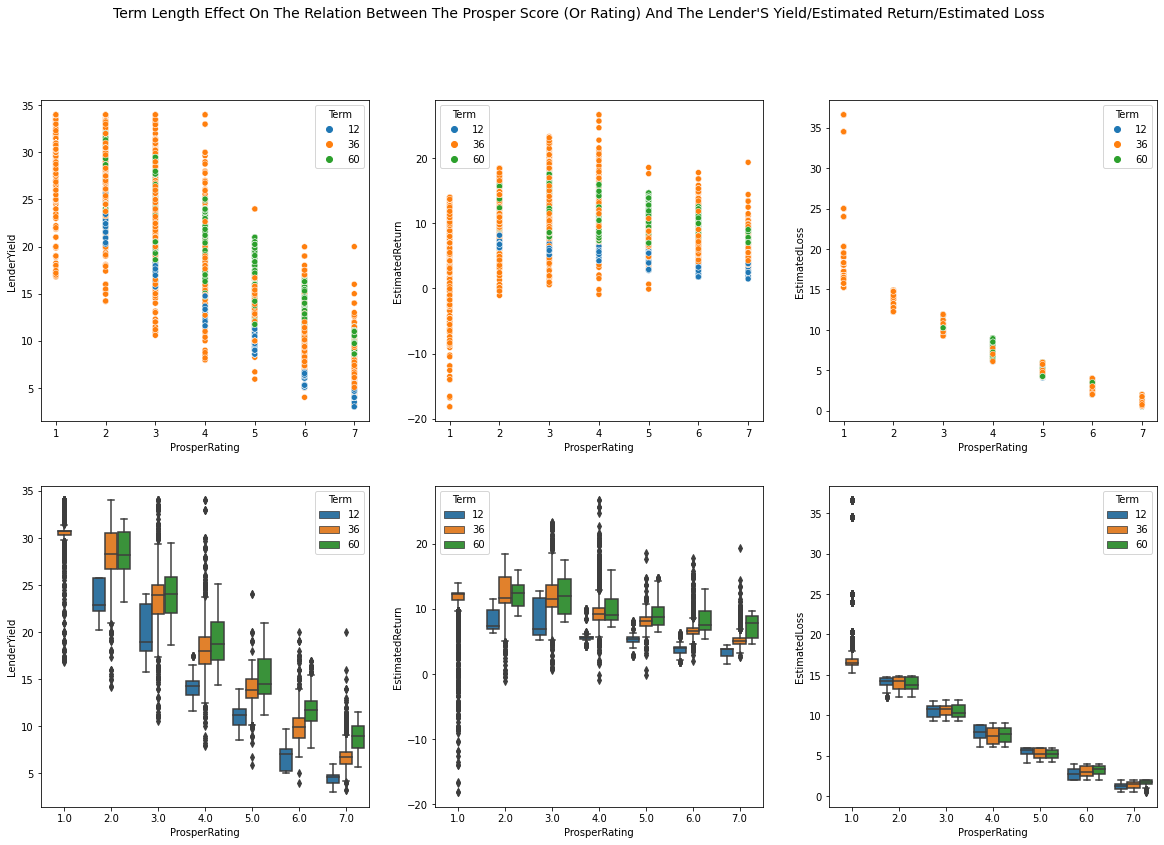

In [42]:
columns = ["LenderYield","EstimatedReturn", "EstimatedLoss"]
plt.figure(figsize=(20, 13))
for i in range(3):
    plt.subplot(231 + i)
    sb.scatterplot(
        data = loan_data, 
        x = loan_data.ProsperRating, 
        y = loan_data[columns[i]]*100,
        hue = "Term"
    )
    
    plt.subplot(234 + i)
    sb.boxplot(
        data = loan_data, 
        x = loan_data.ProsperRating, 
        y = loan_data[columns[i]]*100,
        hue = "Term"
    )   
    
plt.suptitle(
    "Term length effect on the relation between the Prosper score (or rating) and the lender's yield/estimated return/estimated loss ".title(),
    fontsize = 14
);

In general, we can see that the length of the term doesn't have that much effect on relation between the Prosper score and the other variables apart from some interesting points that I would like to talk about:
* The first point I want to talk about is that the 36 months term is the only term that have listings with "1" as a rating (this can be seen more clearly in the box plots in the second row of the plot).
* The second point I want to make is that, in all the box plots, the 12 month terms boxes are, almost, always situated below the other terms, followed by the 36 months term, followed by the 60 months term being positioned at the top in almost every rating (except when the rating is 1)

## Does home ownership play a role on the amount of loan taken or the debt/income ratio?
In this question, we will divide our observation into 4 seperate parts but since our graphs will contain similar graphs, I will create a function to make our analysis a bit more readable (code-volume-wise):

In [43]:
def make_multivariate_bar_chart(X, Y, Hue):
    plot_data = loan_data.groupby([X, Hue])[Y].mean()
    plot_data = plot_data.fillna(0)
    plot_data = plot_data.reset_index()
    
    sb.barplot(
        data=plot_data, 
        x = X,
        y = Y,
        hue = Hue
    )
    plt.xticks(rotation = 45)

### Home ownership effect on the average loan amount per employment status/income range

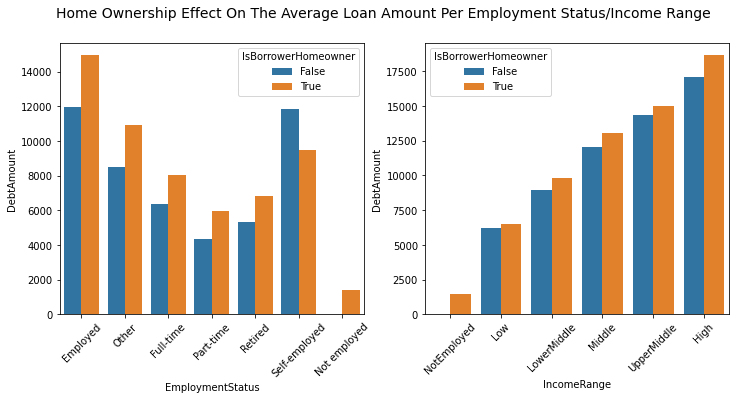

In [44]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
make_multivariate_bar_chart(
    "EmploymentStatus", 
    "DebtAmount", 
    "IsBorrowerHomeowner"
)
plt.xticks(rotation = 45)

plt.subplot(122)
make_multivariate_bar_chart(
    "IncomeRange", 
    "DebtAmount", 
    "IsBorrowerHomeowner" 
)
plt.xticks(rotation = 45);

plt.suptitle(
    "Home ownership effect on the average loan amount per employment status/income range".title(),
    fontsize = 14
);

As we can see from the both graphs above that for the home owner ship in the case of average debt amount per employment status that almost all employment statuses have a higher average debt in the case of a home ownership, the same can also be said in the debt amount per income range, this can indicate that people are more likely to take more loans if they already own a house.

### Home ownership effect on the average debt/income ratio per employment status/income range

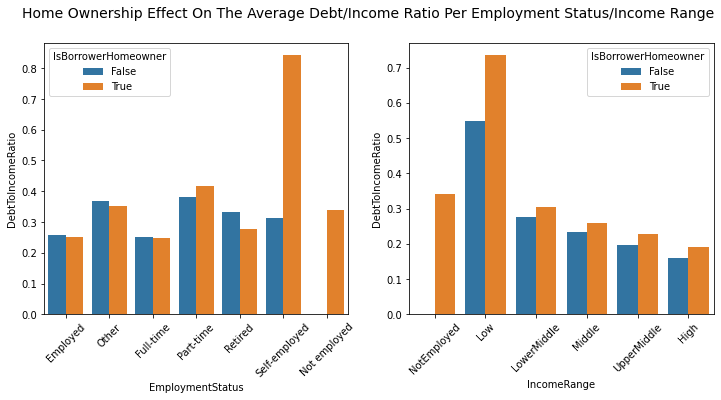

In [45]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
make_multivariate_bar_chart(
    "EmploymentStatus", 
    "DebtToIncomeRatio", 
    "IsBorrowerHomeowner"
)
plt.xticks(rotation = 45)

plt.subplot(122)
make_multivariate_bar_chart(
    "IncomeRange", 
    "DebtToIncomeRatio", 
    "IsBorrowerHomeowner"
)
plt.xticks(rotation = 45)

plt.suptitle(
    "Home ownership effect on the average debt/income ratio per employment status/income range".title(),
    fontsize = 14
);

As we can see from the both graphs above that we've got some interesting results to work with, to observe them more clearly, I will breakdown my observation into two parts:
* For the home ownership effect on the debt/income ratio per employment status, we can see that the home ownership doesn't have much effect on the deb/income ratio, exepct for people who are self-employed where we can see a significant difference if the user is a home owner.
* For the home ownership effect on the debt/income ratio per income range, we can see that home owners have a slightly higher debt/income ratio if they own a house, this difference is significantly more noticeable for people with low income.

<a id="conc"></a>
<h1>Conclusion</h1>
<br>
To end the exploration, I would like to adress and talk about some of the insights we just had.
<li><b>The Number of loans for each term length: </b>In this section of tha exploration analysis we got to see the most common term length of all listings.</li>
<li><b>The most common income range: </b>thanks to this insight, we got to learn more about the income demographic of the Prosper platform's users.</li>
<li><b>The relation between each term and the lender's yield/estimated return: </b>In this section we got to learn about the effect of the term's length on the lender's yield and estimated return.</li>
<li><b>The average loan amount per employment status: </b>For this insight we got to see how what are the employment statuses that tend to take on more debt than the others.</li>
<li><b>The correlation between the Prosper rating and the lender's yield/estimated return/estimated loss: </b>By far, this was the most interesting insight we had in my opinion, where I got to see the relation between these variables</li>
<li><b>The Home ownership's effect on loan amount per employment status/income range: </b>In this section we got to see how home ownership does in fact affect the loan amount taken regardless of income range or employment status.</li>